## Importing Modules

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing Evaluation matrces
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report, plot_confusion_matrix

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

## Loading Dataset

In [39]:
df = pd.read_csv("Churn_Modelling.csv", index_col=[0])
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Exploration

In [40]:
# Function to perform all EDA
def perform_eda(df, name=""):
    # Printing basic detail of data like name, size, shape
    print(f"EDA of {str(name)} Data....")
    print(f"Size {df.size}")
    print(f"Columns {df.shape[1]}")
    print(f"Records {df.shape[0]}")
    print("="*50)
    
    # Printing top 5 records of data
    print("First Look of Data....")
    display(df.head(10))
    print("="*50)
    
    # Getting Numerical and Categorical columns Separately
    cat_cols = df.select_dtypes(np.object).columns
    num_cols = df.select_dtypes(np.number).columns

    # Printing the Numerical columns
    print("Dataset has following Numerical columns...")
    for i, j in enumerate(num_cols):
        print(f" {i+1}) {j}")

    # Printing the Categorical columns
    print("\n\nDataset has following Categorical columns...")
    for i, j in enumerate(cat_cols):
        print(f" {i+1}) {j}")
    
    # Printing info of data like data type, non null values
    print("="*50)
    print("Information of Data....")
    print(df.info())
    print("="*50)
    
    # Displaying statistical properties of data like mean, median, max, min
    print("Statistical Properties of Data....")
    display(df.describe(include="all"))
    print("="*50)

In [41]:
perform_eda(df, "Churn")

EDA of Churn Data....
Size 130000
Columns 13
Records 10000
First Look of Data....


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


Dataset has following Numerical columns...
 1) CustomerId
 2) CreditScore
 3) Age
 4) Tenure
 5) Balance
 6) NumOfProducts
 7) HasCrCard
 8) IsActiveMember
 9) EstimatedSalary
 10) Exited


Dataset has following Categorical columns...
 1) Surname
 2) Geography
 3) Gender
Information of Data....
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [42]:
def make_plots(feature, title="", limited=False, n=10, cmap="icefire"):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=cmap)
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    
    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)
    plt.show()

In [43]:
def make_crosstab(x, target_name, df=df, top_cat=3):
    # Code to get a random color map for graph
    color_maps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 
                  'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 
                  'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 
                  'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
                  'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
                  'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 
                  'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 
                  'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 
                  'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
                  'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
                  'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
                  'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 
                  'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 
                  'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 
                  'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 
                  'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
    
    
    # Selecting Color map
    rand = np.random.randint(1, len(color_maps))
    cmap = color_maps[rand]
    
    # Checking distrbution
    make_plots(df[x], title=f"Distribution of {x}", cmap=cmap)
    
    # Making crosstab and then plotting it in form of bar chart
    pd.crosstab(df[target_name], df[x]).plot(kind="bar", cmap=cmap, stacked=True, figsize=(14, 5))
    plt.show()

    # Calculating the ratio of being churn for each unique value of feature
    data = {}
    for i in df[x].unique():
        nomer = df[((df[target_name] == 1) & (df[x] == i))]
        denom = df[(df[x] == i)]
        try:
            churn_rate = 100*(len(nomer)/len(denom))
        except:
            churn_rate = 0
        data[i] = churn_rate
    
    # Sorting values according to ratio
    data = dict(sorted(data.items(), reverse=True, key=lambda item: item[1]))
    
    # Printing top 3 categories with their ratio
    for i, j in data.items():
        if top_cat > 0:
            print(f"Churn rate for category {str(i).upper()} in variable {str(x).upper()} is {j}")
            top_cat -= 1
        else:
            break

Total unique values are:  3 


Category	Value

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


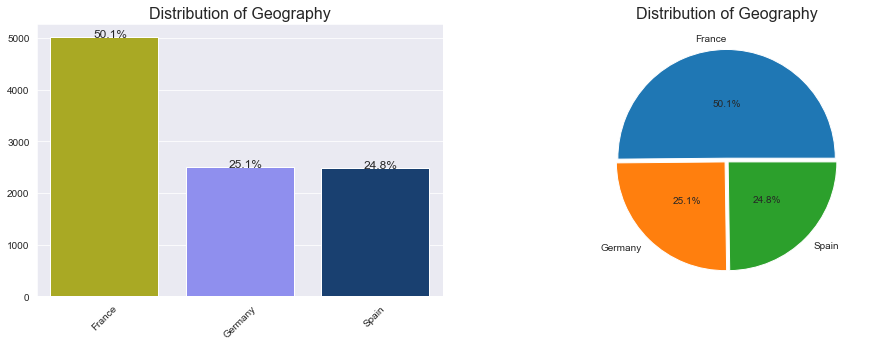

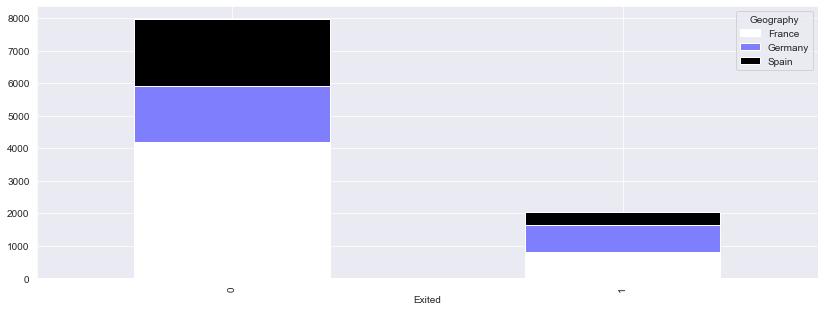

Churn rate for category GERMANY in variable GEOGRAPHY is 32.44320446392985
Churn rate for category SPAIN in variable GEOGRAPHY is 16.673395236172787
Churn rate for category FRANCE in variable GEOGRAPHY is 16.15476665337056


In [44]:
make_crosstab("Geography", "Exited")

Total unique values are:  2 


Category	Value

Male      5457
Female    4543
Name: Gender, dtype: int64


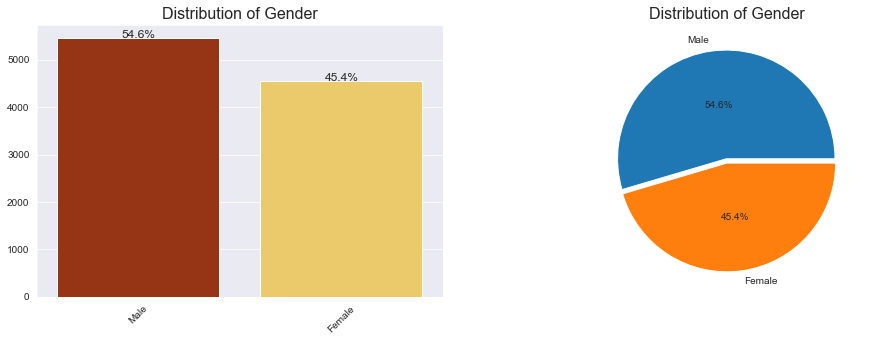

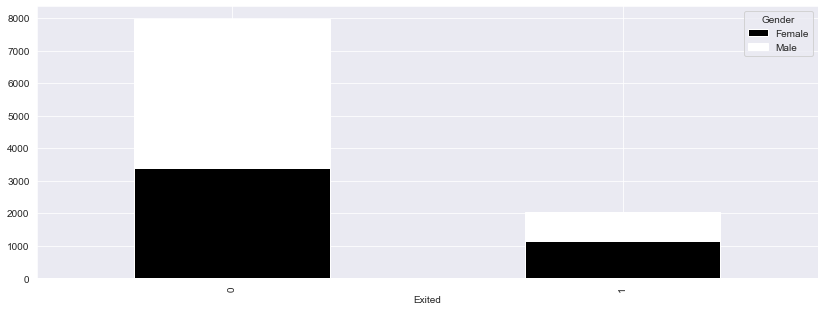

Churn rate for category FEMALE in variable GENDER is 25.071538630860662
Churn rate for category MALE in variable GENDER is 16.455928165658786


In [45]:
make_crosstab("Gender", "Exited")

Total unique values are:  11 


Category	Value

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


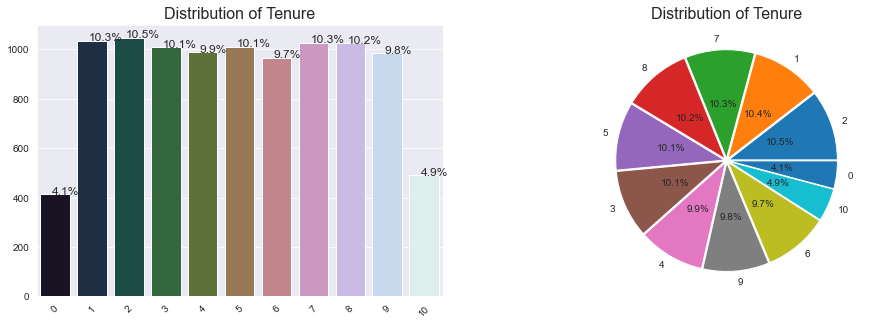

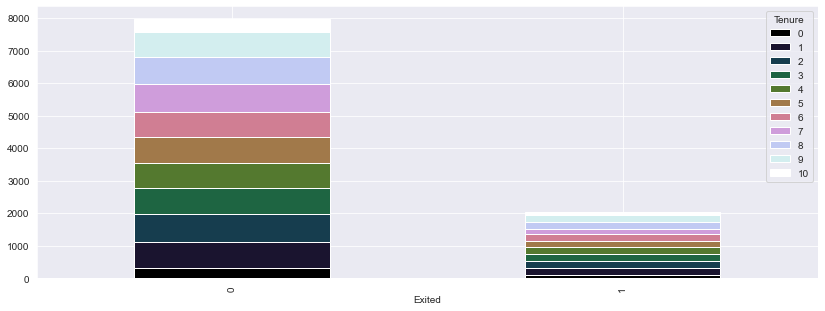

Churn rate for category 0 in variable TENURE is 23.002421307506054
Churn rate for category 1 in variable TENURE is 22.415458937198068
Churn rate for category 9 in variable TENURE is 21.646341463414632
Churn rate for category 3 in variable TENURE is 21.110009910802773
Churn rate for category 5 in variable TENURE is 20.652173913043477


In [46]:
make_crosstab("Tenure", "Exited", top_cat=5)

Total unique values are:  4 


Category	Value

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


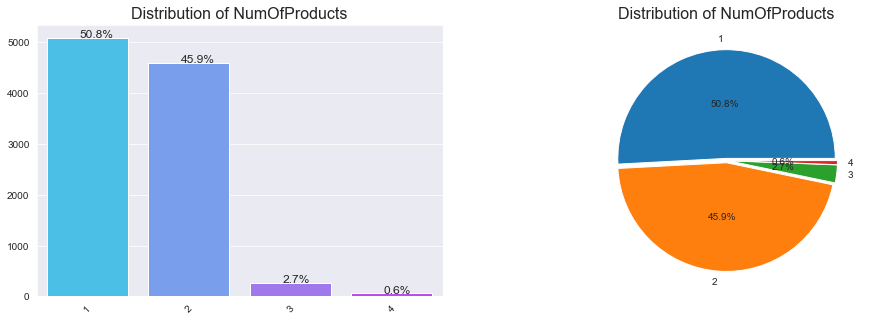

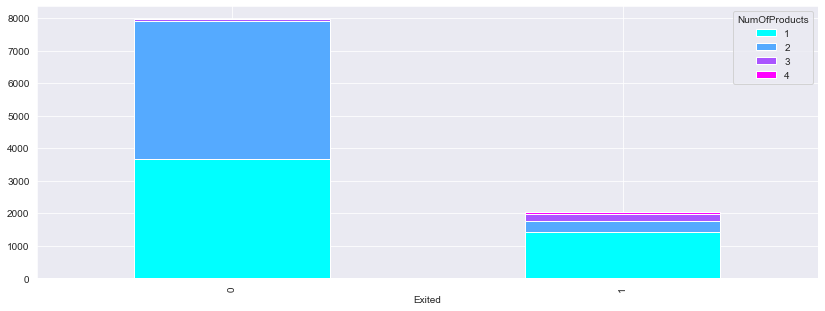

Churn rate for category 4 in variable NUMOFPRODUCTS is 100.0
Churn rate for category 3 in variable NUMOFPRODUCTS is 82.70676691729322
Churn rate for category 1 in variable NUMOFPRODUCTS is 27.714398111723053
Churn rate for category 2 in variable NUMOFPRODUCTS is 7.5816993464052285


In [47]:
make_crosstab("NumOfProducts", "Exited", top_cat=5)

Total unique values are:  2 


Category	Value

1    7055
0    2945
Name: HasCrCard, dtype: int64


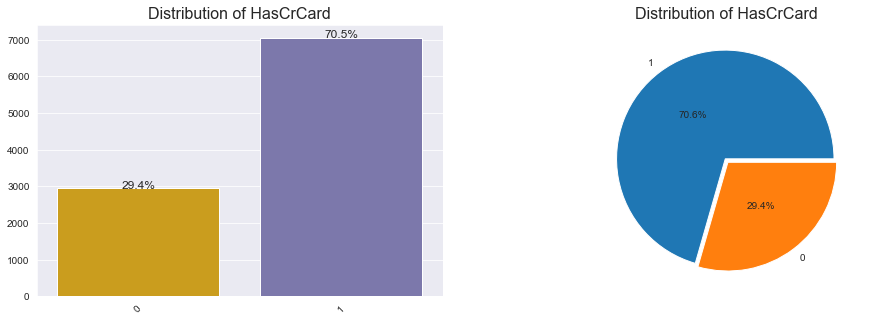

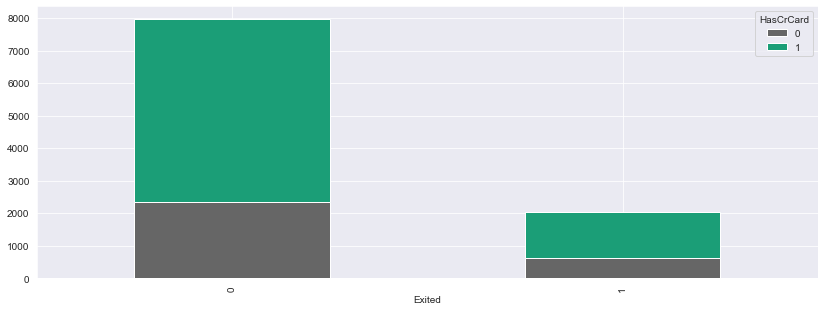

Churn rate for category 0 in variable HASCRCARD is 20.814940577249573
Churn rate for category 1 in variable HASCRCARD is 20.184266477675408


In [48]:
make_crosstab("HasCrCard", "Exited")

Total unique values are:  2 


Category	Value

1    5151
0    4849
Name: IsActiveMember, dtype: int64


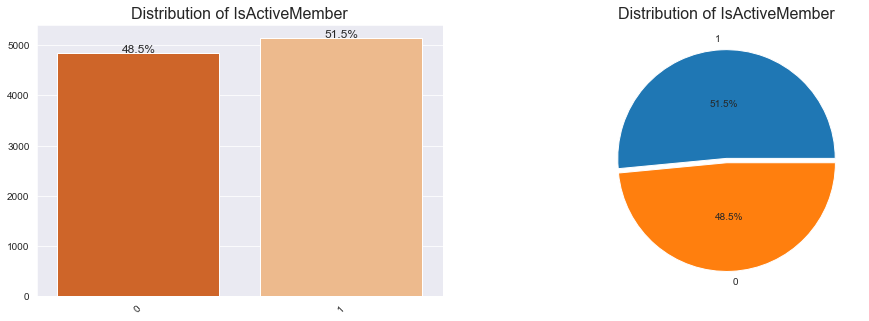

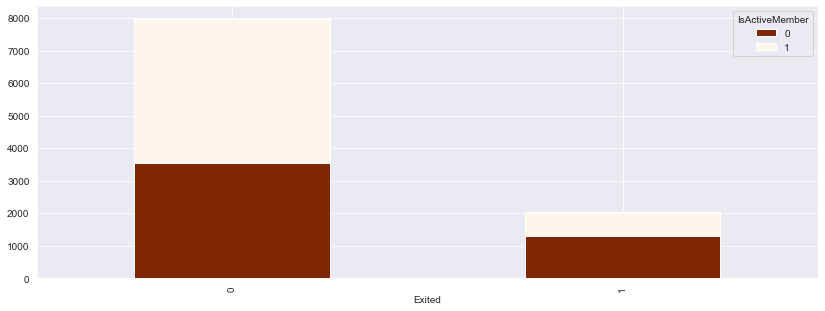

Churn rate for category 0 in variable ISACTIVEMEMBER is 26.850897092183956
Churn rate for category 1 in variable ISACTIVEMEMBER is 14.269073966220153


In [49]:
make_crosstab("IsActiveMember", "Exited")

In [50]:
# Function to explore continous features
def explore_feature(feature_name, target_name="Exited", target_value=1):
    # Printing details
    print(f"Exploring {str(feature_name).upper()}........")
    print(f"Mean of {feature_name}     : {df[feature_name].mean()}")
    print(f"Median of {feature_name}   : {df[feature_name].median()}")
    print(f"Mode of {feature_name}     : {df[feature_name].mode()}")
    print(f"Variance of {feature_name} : {df[feature_name].var()}")
    print(f"Skewness of {feature_name} : {df[feature_name].skew()}")
    print(f"Maximum of {feature_name}  : {df[feature_name].max()}")
    print(f"Minimum of {feature_name}  : {df[feature_name].min()}")
    temp = df[[feature_name, target_name]]
    temp[target_name] = temp[target_name].map({"Negative": 0, 1: 1})
    corr = temp.corr().iloc[0, 1]
    print(f"Correlation with the target feature : {corr}")
    temp = df[df[feature_name] > df[feature_name].mean()]
    ratio = len(temp[temp[target_name] == 1])/len(temp)
    print(f"Ratio of being Churn for the employee whose {feature_name} is more than average value : {ratio}")
    temp = df[df[feature_name] < df[feature_name].mean()]
    ratio = len(temp[temp[target_name] == 1])/len(temp)
    print(f"Ratio of being Churn for the employee whose {feature_name} is less than average value : {ratio}")
    
    # Drawing plots
    fig=plt.figure(figsize=(15, 4))
    plt.subplot(121)
    sns.kdeplot(df[feature_name])
    
    plt.subplot(122)
    sns.boxplot(df[feature_name])
    fig.suptitle("Plots for Whole data")
    plt.show()
    
    temp = df[df[target_name] == 1]
    # Drawing plots
    fig=plt.figure(figsize=(15, 4))
    plt.subplot(121)
    sns.kdeplot(temp[feature_name])
    
    plt.subplot(122)
    sns.boxplot(temp[feature_name])
    fig.suptitle("Plots for Churned People")
    plt.show()

Exploring CREDITSCORE........
Mean of CreditScore     : 650.5288
Median of CreditScore   : 652.0
Mode of CreditScore     : 0    850
dtype: int64
Variance of CreditScore : 9341.860156575705
Skewness of CreditScore : -0.07160660820092675
Maximum of CreditScore  : 850
Minimum of CreditScore  : 350
Correlation with the target feature : nan
Ratio of being Churn for the employee whose CreditScore is more than average value : 0.19356112976496148
Ratio of being Churn for the employee whose CreditScore is less than average value : 0.214097630139761


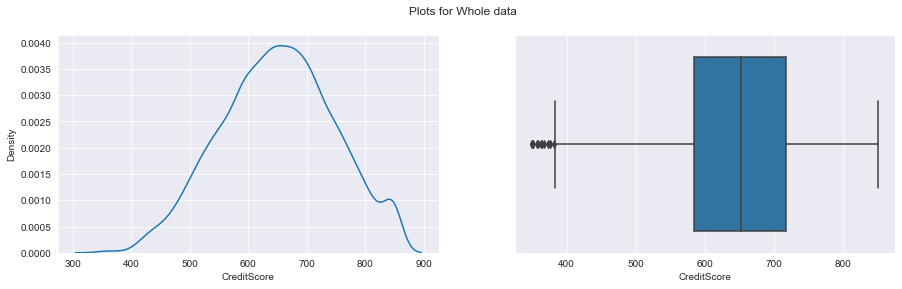

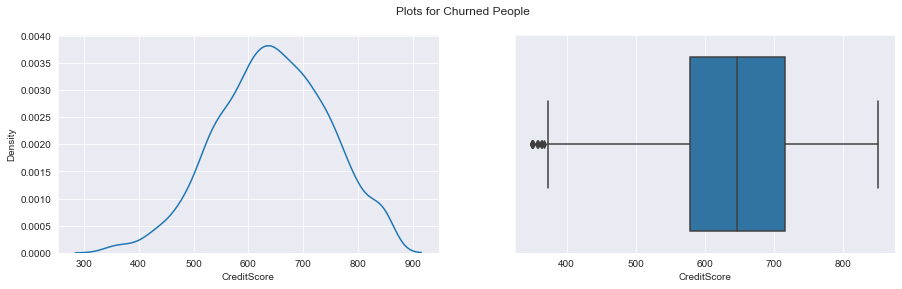

In [51]:
explore_feature("CreditScore")

Exploring AGE........
Mean of Age     : 38.9218
Median of Age   : 37.0
Mode of Age     : 0    37
dtype: int64
Variance of Age : 109.99408416841645
Skewness of Age : 1.0113202630234552
Maximum of Age  : 92
Minimum of Age  : 18
Correlation with the target feature : nan
Ratio of being Churn for the employee whose Age is more than average value : 0.3408476104598738
Ratio of being Churn for the employee whose Age is less than average value : 0.09435657800143782


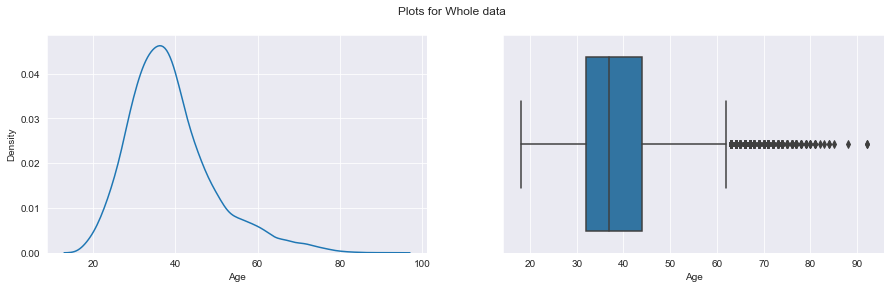

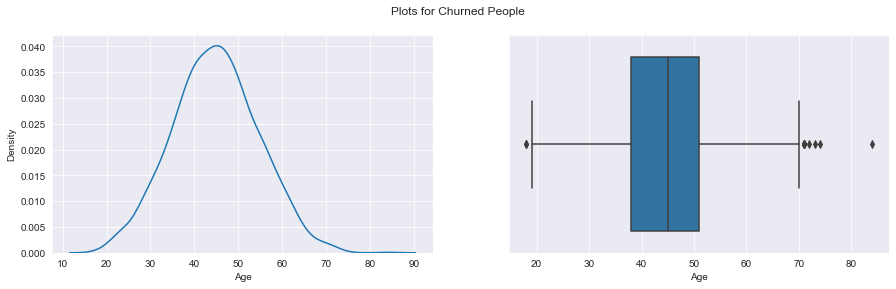

In [52]:
explore_feature("Age")

Exploring ESTIMATEDSALARY........
Mean of EstimatedSalary     : 100090.2398809998
Median of EstimatedSalary   : 100193.915
Mode of EstimatedSalary     : 0    24924.92
dtype: float64
Variance of EstimatedSalary : 3307456784.134519
Skewness of EstimatedSalary : 0.0020853576615585162
Maximum of EstimatedSalary  : 199992.48
Minimum of EstimatedSalary  : 11.58
Correlation with the target feature : nan
Ratio of being Churn for the employee whose EstimatedSalary is more than average value : 0.20810864789294986
Ratio of being Churn for the employee whose EstimatedSalary is less than average value : 0.19927899058682155


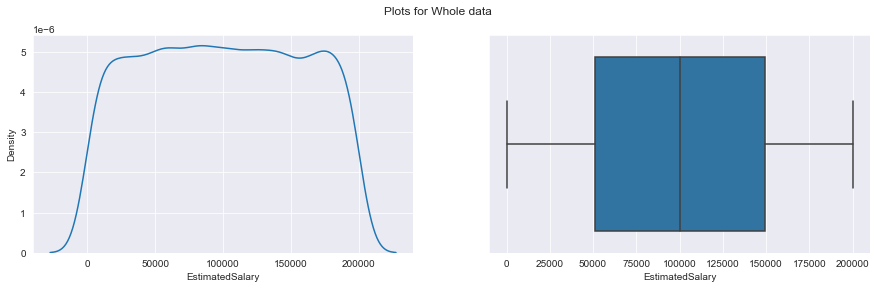

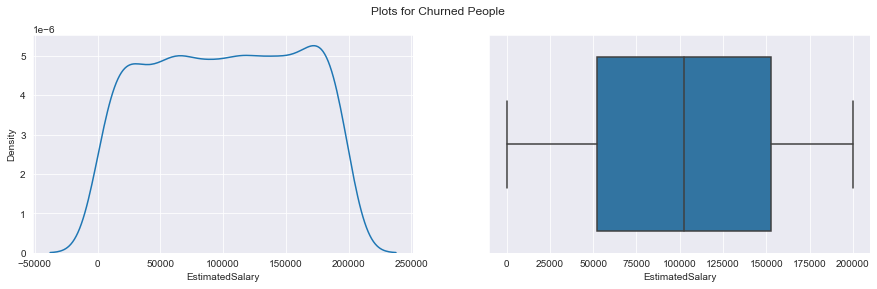

In [53]:
explore_feature("EstimatedSalary")

# Data Cleaning

In [54]:
# Dropping unnecessary features
df.drop(["CustomerId", "Surname"], axis=1, inplace=True)

In [55]:
# Checking null values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [56]:
# Checking duplicates
df[df.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,


In [57]:
# Encoding categorical features
temp = pd.get_dummies(df[["Geography", "Gender"]])
df[temp.columns] = temp

In [58]:
temp

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,
1,1,0,0,1,0
2,0,0,1,1,0
3,1,0,0,1,0
4,1,0,0,1,0
5,0,0,1,1,0
...,...,...,...,...,...
9996,1,0,0,0,1
9997,1,0,0,0,1
9998,1,0,0,1,0


In [21]:
# Dropping features whose encoding is done
df.drop(["Geography", "Gender"], axis=1, inplace=True)

# Handling Outliers

In [22]:
cols = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

# Creating a copy of data
df_n = df.copy()

# Iterating each column
for x in cols:
    # Calculating percentiles & interquartile range
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    # Getting max and min value
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    # Marking values as outlier if they are not in range
    df_n.loc[df[x] < min,x] = np.nan
    df_n.loc[df[x] > max,x] = np.nan

# lets try to check the sum of count of NULL values/outliers in each column of the dataset
temp = df_n.isnull().sum()
print(temp)

CreditScore           15
Age                  359
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
Geography_France       0
Geography_Germany      0
Geography_Spain        0
Gender_Female          0
Gender_Male            0
dtype: int64


In [23]:
# Dropping outliers
df = df_n.dropna(axis = 0)

In [24]:
# Scaling continous faetures
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,
1,-0.330309,0.479282,2,-1.226774,1,1,1,0.021480,1,1,0,0,1,0
2,-0.444790,0.365625,1,0.116386,1,0,1,0.216090,0,0,0,1,1,0
3,-1.547974,0.479282,8,1.332056,3,1,0,0.240239,1,1,0,0,1,0
4,0.502283,0.138311,1,-1.226774,2,0,0,-0.109299,0,1,0,0,1,0
5,2.073800,0.592939,2,0.784746,1,1,1,-0.365608,0,0,0,1,1,0


# Train test split

In [25]:
# Splitting into X, y
X = df.drop("Exited", axis=1)
y = df.Exited

In [26]:
# Spliting into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Total unique values are:  2 


Category	Value

0    5380
1    1358
Name: Exited, dtype: int64


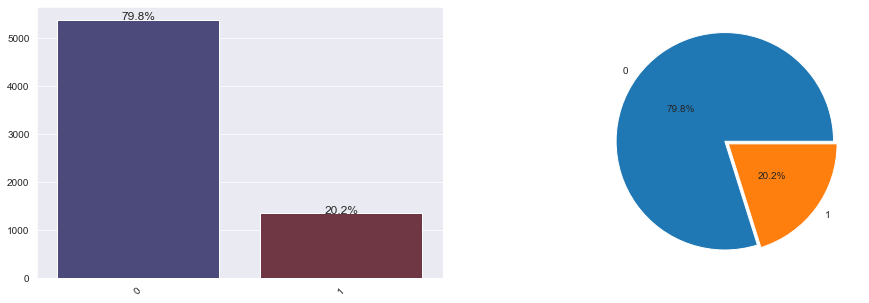

In [27]:
make_plots(y_train)

In [28]:
# Balancing data
sampler = SMOTE()
X_train, y_train = sampler.fit_resample(X_train, y_train)

Total unique values are:  2 


Category	Value

1    5380
0    5380
Name: Exited, dtype: int64


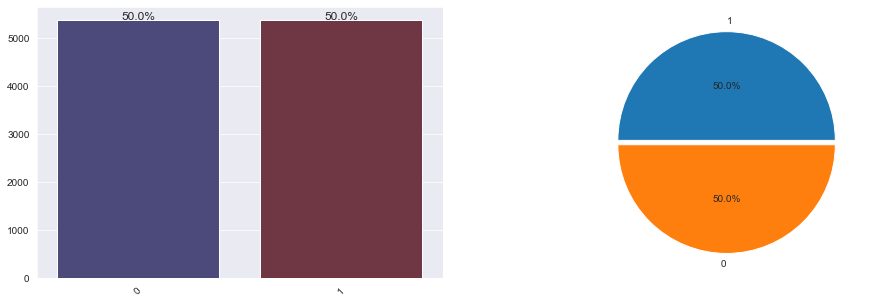

In [29]:
make_plots(y_train)

# Building Models

+ ==================================================================================================== +
			1-For LogisitcRegression The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7635041551246537
--------------------------------------------------
F1 :  [0.84381432 0.51318603]
--------------------------------------------------
Reacll :  [0.80322159 0.60913706]
--------------------------------------------------
Precision :  [0.88872832 0.44334975]
--------------------------------------------------
Confusion Matrix....
 [[1845  452]
 [ 231  360]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      2297
           1       0.44      0.61      0.51       591

    accuracy                           0.76      2888
   macro avg       0.67      0.71      0.68      2888

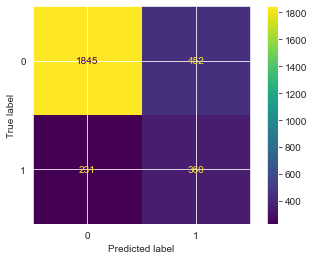

							-----------------------------------------------------------
							 Time for detection (LogisitcRegression) : 0.673 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For KNeighborsClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7576177285318559
--------------------------------------------------
F1 :  [0.83833718 0.51590595]
--------------------------------------------------
Reacll :  [0.79016108 0.63113367]
--------------------------------------------------
Precision :  [0.89276931 0.43625731]
--------------------------------------------------
Confusion Matrix....
 [[1815  482]
 [ 218  373]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0

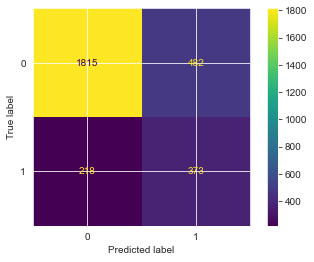

							-----------------------------------------------------------
							 Time for detection (KNeighborsClassifier) : 1.587 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For RandomForestClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8351800554016621
--------------------------------------------------
F1 :  [0.89634146 0.59797297]
--------------------------------------------------
Reacll :  [0.89595124 0.59898477]
--------------------------------------------------
Precision :  [0.89673203 0.59696459]
--------------------------------------------------
Confusion Matrix....
 [[2058  239]
 [ 237  354]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

        

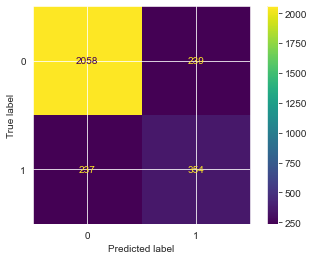

							-----------------------------------------------------------
							 Time for detection (RandomForestClassifier) : 3.054 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For AdaBoostClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7970914127423823
--------------------------------------------------
F1 :  [0.86497696 0.59192201]
--------------------------------------------------
Reacll :  [0.81715281 0.71912014]
--------------------------------------------------
Precision :  [0.91874694 0.50295858]
--------------------------------------------------
Confusion Matrix....
 [[1877  420]
 [ 166  425]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

          

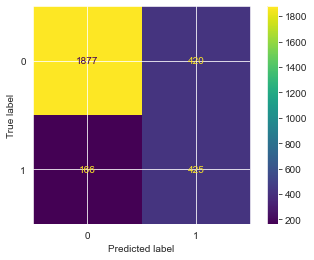

							-----------------------------------------------------------
							 Time for detection (AdaBoostClassifier) : 1.712 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For DecisionTreeClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7790858725761773
--------------------------------------------------
F1 :  [0.85669362 0.51812689]
--------------------------------------------------
Reacll :  [0.83021332 0.58037225]
--------------------------------------------------
Precision :  [0.88491879 0.46793997]
--------------------------------------------------
Confusion Matrix....
 [[1907  390]
 [ 248  343]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

          

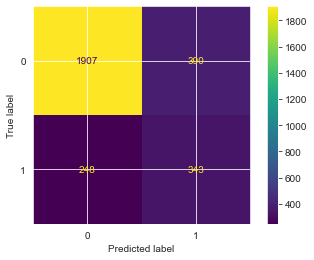

							-----------------------------------------------------------
							 Time for detection (DecisionTreeClassifier) : 0.506 seconds...
							-----------------------------------------------------------



In [30]:
# check the performance on diffrent regressor
models = []
models.append(('LogisitcRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))


# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name, model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()

In [31]:
comp = pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})
comp

,Model,Accuracy,Precision,Recall,F1_Score,Confusion Matrix
0,LogisitcRegression,0.763504,"[0.888728323699422, 0.4433497536945813]","[0.8032215933826731, 0.6091370558375635]","[0.8438143151154813, 0.5131860299358517]","[[1845, 452], [231, 360]]"
1,KNeighborsClassifier,0.757618,"[0.8927693064436792, 0.43625730994152045]","[0.7901610796691336, 0.6311336717428088]","[0.8383371824480369, 0.5159059474412171]","[[1815, 482], [218, 373]]"
2,RandomForestClassifier,0.835180,"[0.8967320261437909, 0.596964586846543]","[0.8959512407488028, 0.5989847715736041]","[0.8963414634146343, 0.5979729729729729]","[[2058, 239], [237, 354]]"
3,AdaBoostClassifier,0.797091,"[0.9187469407733725, 0.5029585798816568]","[0.8171528080104484, 0.7191201353637902]","[0.8649769585253455, 0.5919220055710306]","[[1877, 420], [166, 425]]"
4,DecisionTreeClassifier,0.779086,"[0.8849187935034802, 0.4679399727148704]","[0.8302133217239878, 0.5803722504230119]","[0.8566936208445641, 0.5181268882175227]","[[1907, 390], [248, 343]]"


# Building Final Model

Accuracy :  0.8320637119113573
--------------------------------------------------
F1 :  [0.89435853 0.5907173 ]
--------------------------------------------------
Reacll :  [0.89377449 0.59221658]
--------------------------------------------------
Precision :  [0.89494333 0.58922559]
--------------------------------------------------
Confusion Matrix....
 [[2053  244]
 [ 241  350]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      2297
           1       0.59      0.59      0.59       591

    accuracy                           0.83      2888
   macro avg       0.74      0.74      0.74      2888
weighted avg       0.83      0.83      0.83      2888

--------------------------------------------------
Plotting Confusion Matrix...



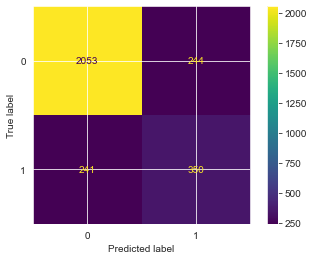

In [32]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

# predict values
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Precision
precision = precision_score(y_test, y_pred, average=None)
# Recall
recall = recall_score(y_test, y_pred, average=None)
# F1 Score
f1_sco = f1_score(y_test, y_pred, average=None)
# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
# Report
report = classification_report(y_test, y_pred)


print('Accuracy : ', accuracy)   
print("-"*50)
print('F1 : ', f1_sco)
print("-"*50)
print('Reacll : ', recall)
print("-"*50)
print('Precision : ', precision)
print("-"*50)
print('Confusion Matrix....\n', confusion_mat)
print("-"*50)
print('Classification Report....\n', report)
print("-"*50)
print('Plotting Confusion Matrix...\n')
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [33]:
# save the model to disk
import pickle as pkl

filename = 'finalized_model.sav'
pkl.dump(model, open(filename, 'wb'))